<a href="https://colab.research.google.com/github/adancalderon/MLintro/blob/main/Ex_3_Solutions_COMP_4980_Winter_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_blobs

X,y = make_blobs(1000,centers=3, n_features=3, cluster_std=[3,3,3])

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


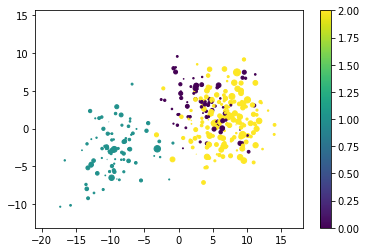

In [ ]:
plt.scatter(X[:,0], X[:,1], s=X[:,2]*5+15, c = y)
plt.colorbar()
plt.show()

In [ ]:
def getKNN(test, t_X, t_y, k):
  distances = []
  f = len(t_X[0])

  for i in range( len(X) ):
    p = t_X[i]
    d = 0

    for j in range(f):
      d += ( test[j] - p[j] ) ** 2
    d = np.sqrt( d ) # Euclidean distance
    distances.append( [ d, t_y[i] ] )

  distances.sort(key = lambda p : p[0])

  return distances[:k]

In [ ]:
def classify(ds):
  votes = dict()
  for d in ds:
    c = d[1] # class information
    if c in votes:
      votes[c] += 1
    else:
      votes[c] = 1

  l = list(votes.items())
  np.random.shuffle(l)
  votes = dict(l)

  return max(votes, key = votes.get)

**Using the methods from the Sci-Kit Learn library:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#clf = KNeighborsClassifier(p=1) # Manhattan distance
clf = KNeighborsClassifier(metric='mahalanobis', metric_params = {'V': np.cov(X_train, rowvar=False)})

clf.fit(X_train, y_train) # learn
y_pred = clf.predict(X_test) # test


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.995

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[62  0  0]
 [ 0 72  0]
 [ 1  0 65]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      1.00      1.00        72
           2       1.00      0.98      0.99        66

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
error = []

for i in range(1,20):
  #clf = KNeighborsClassifier(n_neighbors=i)
  clf = KNeighborsClassifier(n_neighbors=i, metric='mahalanobis', metric_params = {'V': np.cov(X_train, rowvar=False)})
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  error.append(1-accuracy_score(y_test,y_pred))

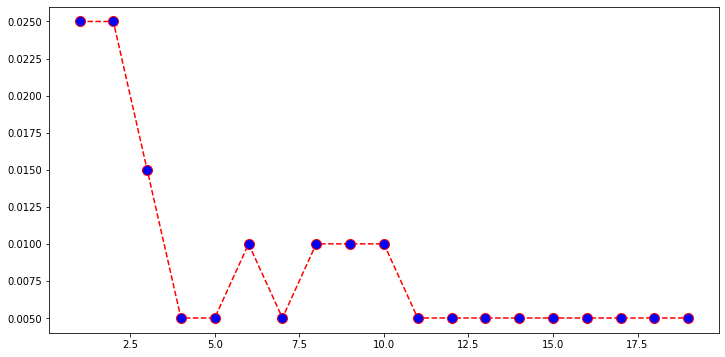

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), error, color='red', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize=10)
